# 16_ShootLengthGrowth_Vis
In diesem Jupyter Notebook werden das Wachstum gemessen an den Messstreifen in einer Visualisierung dargestellt.

*Der folgende Code wurde mithilfe von ChatGPT (OpenAI) erstellt und bearbeitet.*

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
# CSV-Datei einlesen
df = pd.read_csv("./170_BaseData/zeitreihe_pg_auswertung.csv", delimiter=';')

### 1. Visualisierung der RMSE Werte der Kirsche (Zeitreihe)

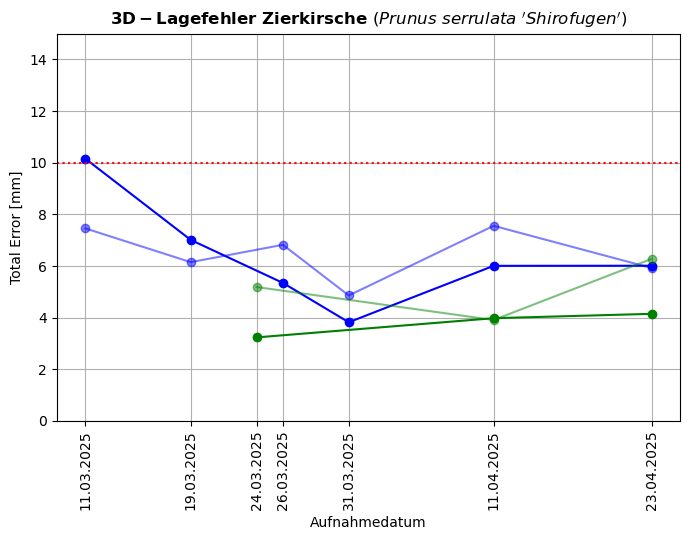

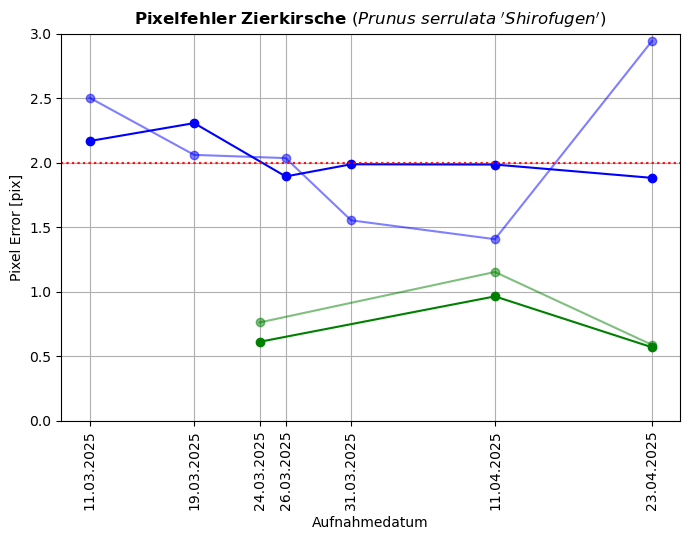

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Datentypen anpassen
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')
df['3D_ERROR CHECK'] = pd.to_numeric(df['3D_ERROR CHECK'], errors='coerce')
df['PIX_ERRROR CHECK'] = pd.to_numeric(df['PIX_ERRROR CHECK'], errors='coerce')

# Farbschema für Drohnen
color_map = {
    'dji mini 3 pro': 'blue',
    'dji phantom 4 rtk': 'green',
    'cranecam': 'red'
}

# Referenzlinien
reference_lines = {
    'dji mini 3 pro': {'PIX': 2.0, '3D': 10},
    'dji phantom 4 rtk': {'PIX': 2.0, '3D': 10},
    'cranecam': {'PIX': 0.5, '3D': 15}
}

# Legende
legend_elements = [
    mlines.Line2D([], [], color='red', linestyle=':', label='Erwartungswert'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='-', label='DJI Mini 3 Pro - Control Points'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='-', alpha=0.5, label='DJI Mini 3 Pro - Check Points'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', label='Phantom 4 Pro V2 - Control Points'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', alpha=0.5, label='Phantom 4 Pro V2 - Check Points'),
]

# Daten für spezifischen Baum filtern
tree_name = "kirsche"
tree_df = df[df['baum'] == tree_name]

# === 3D Error Plot ===
fig_3d, ax_3d = plt.subplots(figsize=(7, 5.5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_3d.axhline(reference_lines[drone]['3D'], color='red', linestyle=':', alpha=0.7)

# Datumsformat für X-Achse anpassen
dates_sorted = tree_df['datum'].sort_values().unique()
labels_sorted = pd.to_datetime(dates_sorted).strftime('%d.%m.%Y')
ax_3d.set_xticks(dates_sorted)
ax_3d.set_xticklabels(labels_sorted, rotation=90)

ax_3d.set_title(r"$\bf{3D-Lagefehler\ Zierkirsche}$ ($\it{Prunus\ serrulata\ 'Shirofugen'}$)")
ax_3d.set_ylabel('Total Error [mm]')
ax_3d.set_xlabel('Aufnahmedatum')
ax_3d.set_ylim(bottom=0, top=15)
ax_3d.grid(True)
plt.tight_layout()
plt.show()

# === Pixel Error Plot ===
fig_pix, ax_pix = plt.subplots(figsize=(7, 5.5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_pix.axhline(reference_lines[drone]['PIX'], color='red', linestyle=':', alpha=0.7)

# Datumsformat für X-Achse anpassen
ax_pix.set_xticks(dates_sorted)
ax_pix.set_xticklabels(labels_sorted, rotation=90)

ax_pix.set_title(r"$\bf{Pixelfehler\ Zierkirsche}$ ($\it{Prunus\ serrulata\ 'Shirofugen'}$)")
ax_pix.set_ylabel('Pixel Error [pix]')
ax_pix.set_xlabel('Aufnahmedatum')
ax_pix.set_ylim(bottom=0, top=3)
ax_pix.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Deine Legendenelemente
legend_elements = [
    mlines.Line2D([], [], color='red', linestyle=':', label='Erwartungswert'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='-', label='DJI Mini 3 Pro - Control Points'),
    mlines.Line2D([], [], color='blue', marker='o', linestyle='-', alpha=0.5, label='DJI Mini 3 Pro - Check Points'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', label='Phantom 4 Pro V2 - Control Points'),
    mlines.Line2D([], [], color='green', marker='o', linestyle='-', alpha=0.5, label='Phantom 4 Pro V2 - Check Points'),
]

# Leeres Bild nur für die Legende
fig_legend = plt.figure(figsize=(12, 1.2))  # Breiter, flach
ax = fig_legend.add_subplot(111)

# Legende zentriert, einzeilig
fig_legend.legend(
    handles=legend_elements,
    loc='center',
    ncol=len(legend_elements),  # alle nebeneinander
    frameon=False
)

ax.axis('off')  # Keine Achsen

# Als Datei speichern
plt.tight_layout()
fig_legend.savefig("171_Output.\legende_kirsche.png", dpi=300, bbox_inches='tight', transparent=True)
plt.close(fig_legend)


### 2. Visualisierung der RMSE Werte der Baumgruppe Winterthur (Zeitreihe)

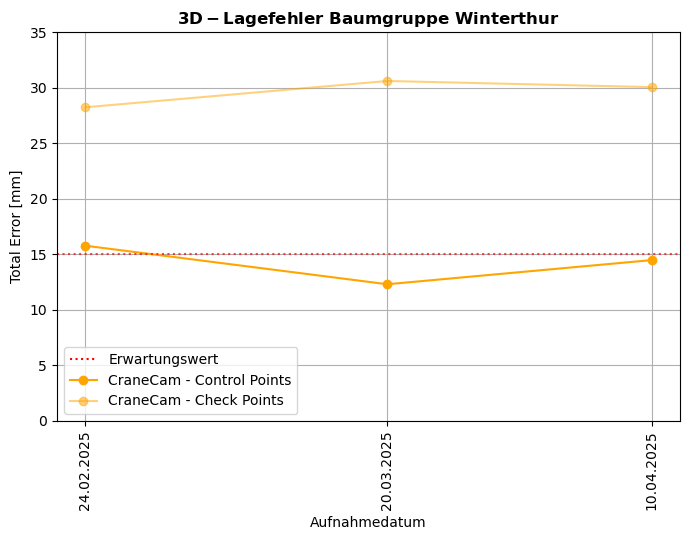

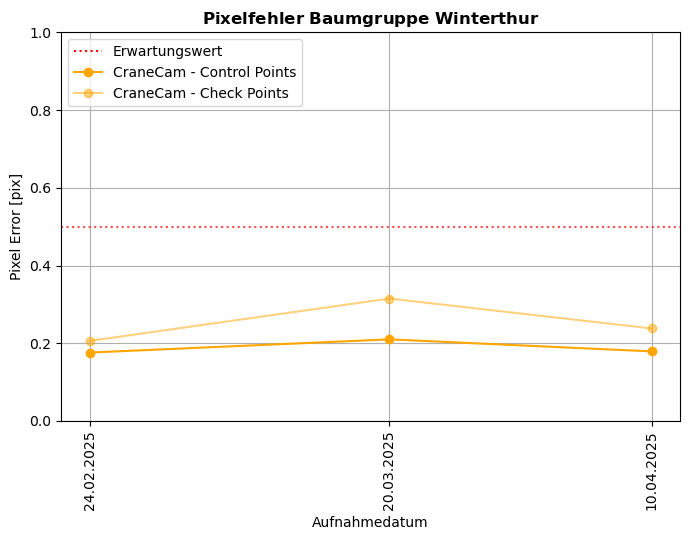

In [19]:
# Datentypen anpassen
df['datum'] = pd.to_datetime(df['datum'], format='%d.%m.%Y')
df['3D_ERROR CHECK'] = pd.to_numeric(df['3D_ERROR CHECK'], errors='coerce')
df['PIX_ERRROR CHECK'] = pd.to_numeric(df['PIX_ERRROR CHECK'], errors='coerce')

# Farbschema für Drohnen
color_map = {
    'dji mini 3 pro': 'blue',
    'dji phantom 4 rtk': 'green',
    'cranecam': 'orange'
}

# Referenzlinien
reference_lines = {
    'dji mini 3 pro': {'PIX': 2.0, '3D': 10},
    'dji phantom 4 rtk': {'PIX': 2.0, '3D': 10},
    'cranecam': {'PIX': 0.5, '3D': 15}
}

# Legende
legend_elements = [
    mlines.Line2D([], [], color='red', linestyle=':', label='Erwartungswert'),
    mlines.Line2D([], [], color='orange', marker='o', linestyle='-', label='CraneCam - Control Points'),
    mlines.Line2D([], [], color='orange', marker='o', linestyle='-', alpha=0.5, label='CraneCam - Check Points'),
]

# Daten für spezifischen Baum filtern
tree_name = "gruppe"
tree_df = df[df['baum'] == tree_name]

# === 3D Error Plot ===
fig_3d, ax_3d = plt.subplots(figsize=(7, 5.5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_3d.plot(drone_df['datum'], drone_df['3D_ERROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_3d.axhline(reference_lines[drone]['3D'], color='red', linestyle=':', alpha=0.7)

# X-Achse: echte Datumswerte beschriften
dates_sorted = tree_df['datum'].sort_values().unique()
labels_sorted = pd.to_datetime(dates_sorted).strftime('%d.%m.%Y')
ax_3d.set_xticks(dates_sorted)
ax_3d.set_xticklabels(labels_sorted, rotation=90)

ax_3d.set_title(r"$\bf{3D-Lagefehler\ Baumgruppe\ Winterthur}$")
ax_3d.set_ylabel('Total Error [mm]')
ax_3d.set_xlabel('Aufnahmedatum')
ax_3d.set_ylim(bottom=0, top=35)
ax_3d.legend(handles=legend_elements, loc='lower left')
ax_3d.grid(True)
plt.tight_layout()
plt.show()

# === Pixel Error Plot ===
fig_pix, ax_pix = plt.subplots(figsize=(7, 5.5))
for drone in tree_df['drohne'].unique():
    drone_df = tree_df[tree_df['drohne'] == drone]
    color = color_map.get(drone, 'black')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CONTROL'], label=f'{drone} - Control', color=color, marker='o')
    ax_pix.plot(drone_df['datum'], drone_df['PIX_ERRROR CHECK'], label=f'{drone} - Check', color=color, marker='o', alpha=0.5)
    ax_pix.axhline(reference_lines[drone]['PIX'], color='red', linestyle=':', alpha=0.7)

# X-Achse: echte Datumswerte beschriften
ax_pix.set_xticks(dates_sorted)
ax_pix.set_xticklabels(labels_sorted, rotation=90)

ax_pix.set_title(r"$\bf{Pixelfehler\ Baumgruppe\ Winterthur}$")
ax_pix.set_ylabel('Pixel Error [pix]')
ax_pix.set_xlabel('Aufnahmedatum')
ax_pix.set_ylim(bottom=0, top=1)
ax_pix.legend(handles=legend_elements, loc='upper left')
ax_pix.grid(True)
plt.tight_layout()
plt.show()
